In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
#the three algorithms I will be using
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import pandas as pd
#review lecture 16
#scikit-learn
    #try 3 different algorithims
    #normalize data

In [2]:
#importing datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Data Fields (from Kaggle)
# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals -->

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Visualization

<AxesSubplot: xlabel='count'>

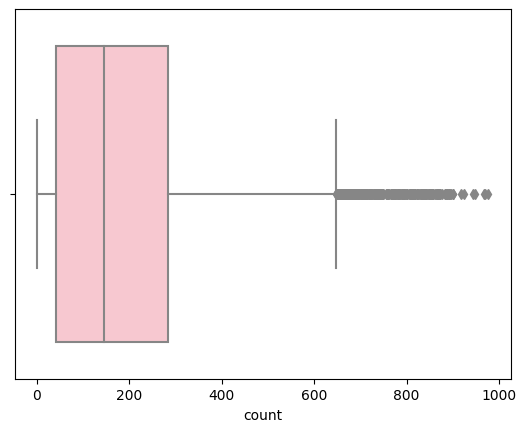

In [5]:
sns.boxplot(x='count', data=train, color='pink')

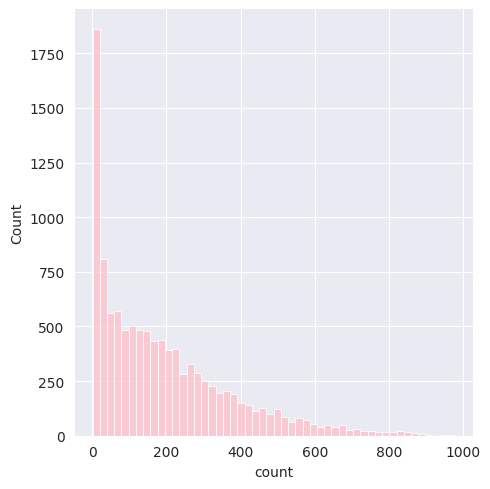

In [6]:
sns.set_style('darkgrid')
sns.displot(train['count'], bins= 50, color = 'pink')

In [7]:
#the data is very skewed

# visualization of the features

['temp', 'atemp', 'humidity', 'windspeed']


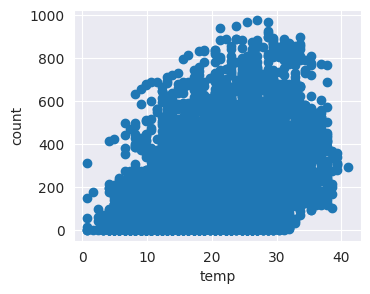

In [8]:
fields = [f for f in train]
fields = fields[5:-3]
print(fields)

fig = plt.figure(figsize=(17,3))

for i, f in enumerate(fields):
    ax = fig.add_subplot(1,4,i+1)
    ax.scatter(train[f], train['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
    
    plt.show()

In [9]:
# x = ["spring","summer","fall","winter"]
# y , y1, y2 = [],[],[]
# for i in range(1,5):
#     y.append(np.mean(train[train["season"]==i]["temp"].values.tolist()))
#     y1.append(np.mean(train[train["season"]==i]["atemp"].values.tolist()))
#     y2.append(np.mean(train[train["season"]==i]["count"].values.tolist()))

# plt.figure(figsize=(20,10))

# for i in range(len(x)): # season counts visualize
#     height = y2[i]
#     plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)
# plt.title("Season's average temp/atemp")
# plt.xlabel("Season")
# plt.ylabel("Counts")
# plt.bar(x,y2,color="skyblue",label="count")
# ay1.plot(x,y1,color="red",label="average atemp")
# ay1.plot(x,y,color='yellow',label="average temp")
# plt.ylabel("temp")
# plt.legend()   

In [10]:
# year = []
# month = []
# day = []
# time = []
# for i in range(len(train)):
#     year.append(int(train["datetime"].values[i].split()[0].split("-")[0]))
#     month.append(int(train["datetime"].values[i].split()[0].split("-")[1]))
#     day.append(int(train["datetime"].values[i].split()[0].split("-")[2]))
#     time.append(int(train["datetime"].values[i].split()[1].split(":")[0]))
# train["year"] = year
# train["month"] = month
# train["day"] = day
# train["time"] = time   

In [11]:
# train["year"].value_counts().values[0]
# x = ["January","Febuary","March","April","May","June","July","August","October","September","November","December"]
# y = []
# for i in range(1,13):
#     y.append(train[train["month"]==i]["count"].sum())
# plt.figure(figsize=(20,8))
# for i in range(len(x)):
#     height = y[i]
#     plt.text(x[i], height + 1.9, '%.1f' %height, ha='center', va='bottom', size = 12)
# plt.title("")
# plt.xlabel("Month")
# plt.ylabel("per Month's Usage   (total year)")
# plt.bar(x,y)

In [12]:
train["year"].value_counts().values[0]

KeyError: 'year'

In [ ]:
all_df = pd.concat([train, test])

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(421)
all_df['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
all_df['weather'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
all_df['humidity'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
all_df['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
all_df['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
all_df['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
all_df['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
all_df['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

# Data Processing

In [ ]:
#splitting 'datetime' column with converting to object
#log count column to remove skewniss
#eliminate outliers
#min/max scaling of the numeric columns

In [39]:
#converting the datime column to each elements(year, month, day, dayofweek, hour)
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train.head()

TypeError: 'NoneType' object is not subscriptable

In [37]:
#splitting datetime to year, month, day
def split_datetime(df):
    #extracting the year
    df['year'] = df['datetime'].apply(lambda t:t.year)
    #extracting the month
    df['month'] = df['datetime'].apply(lambda t:t.month)
    #extracting the day
    df['day'] = df['datetime'].apply(lambda t:t.day)
    #extracting the day of the week
    df['dayofweek'] = df['datetime'].apply(lambda t:t.dayofweek)
    #extracting the hour
    df['hour'] = df['datetime'].apply(lambda t:t.hour)
    df = df.drop(['datetime'], axis= 1)
    return df

In [38]:
train = split_datetime(train)
test = split_datetime(test)
train = train.drop(['casual', 'registered'],axis =1)
train.head()

TypeError: 'NoneType' object is not subscriptable